## Try to plot out some information from the testing HDF5 file

This log is part of the practices for 1st POLARIS XFEL beamtime at Desy, FLASH (Oct.2018)

Here we try to plot out some information based on the given testing HDF5 file

----------- 
 Created by  Hsin-Yi Wang (wang.hy@fysik.su.se), Date: 28-Aug-2018
- Note: This script shuld be operated under Python 3 environment 

### Import module from python

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import h5py
from os import walk
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Define useful function

In [2]:
def line(x,a,b):
    return a*x+b

def gaussian(x,a,b,c,d):
    return np.abs(a)*np.exp(-4*np.log(2)*(x-b)**2./(c**2))+d
"""
def gaussian0(x,a,b,c):
    return np.abs(a)*np.exp(-4*np.log(2)*(x-b)**2./(c**2))
"""
def fit(function,x,y,p0=None,sigma=None,bounds=None):
    popt,pcov = curve_fit(function,x,y,p0=p0,sigma=sigma)
    x = np.arange(0,3e3,1e-2)
    curve = function(x,*popt)
    perr = np.sqrt(np.diag(pcov))
    return popt,x,curve,perr

def discover_datas(path):
    for (dirpath, dirnames, datanames) in walk(path):
        break
    if len(datanames) != 0 :
        mask = np.ones(len(datanames), dtype=bool) 
        for i in np.arange(len(datanames)) :
            if datanames[i][0] == '.' : 
                mask[i] = 0
        datanames = np.array(datanames)
        datanames = datanames[mask]
    return datanames

### Load data

In [3]:
## change the data_path according to your own setting
data_path = '/Users/hsin-yiwang/Desktop/Insitucell_for_XPS/FlashBeamtime/TestingHDF5file/'
data_names = discover_datas(data_path)
print (data_names)
h5file = h5py.File(data_path+data_names[0], 'r')

['FLASH1_USER1_stream_2_run16660_file1_20170410T152307.1.h5']


### plot out the averaged image

Number of shoots = 206


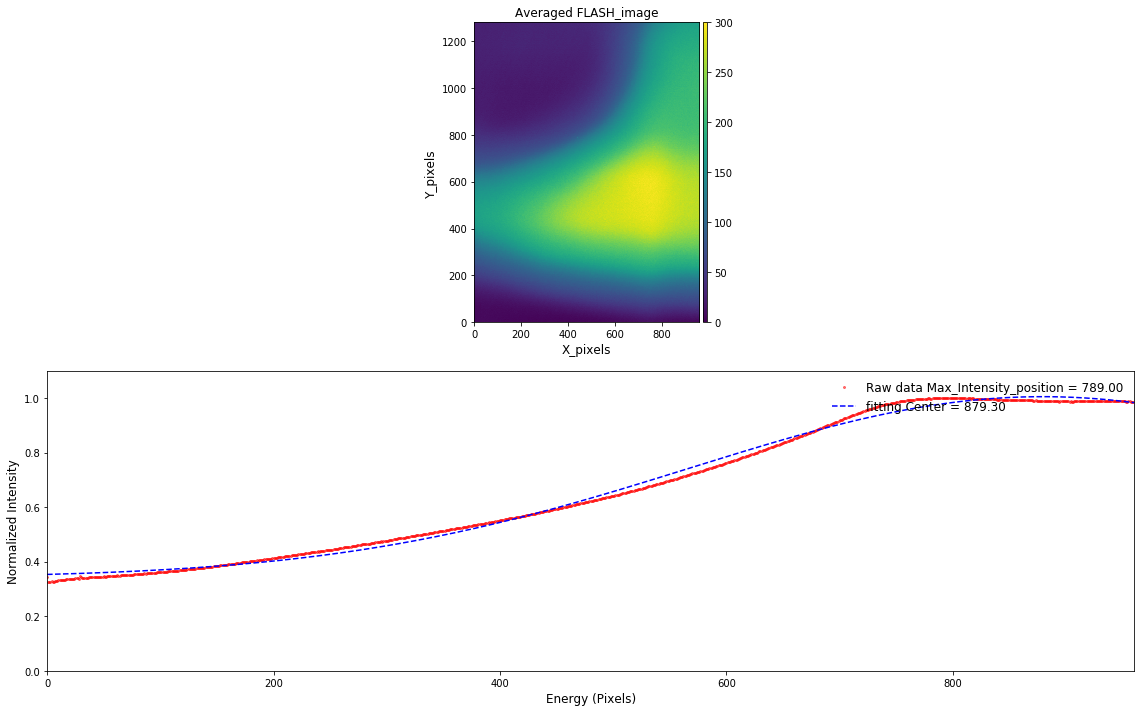

In [10]:
FLASH_image = h5file['/Experiment/BL1/CAMP/Pike camera 1/image'].value
Shoot_number = np.shape(FLASH_image)[0]
Num_xpixel = np.shape(FLASH_image)[2]
xpixel = np.arange(0,Num_xpixel)
FLASH_image_avg = np.sum(FLASH_image,axis=0)/Shoot_number
Profile = np.sum(FLASH_image_avg, axis =0)
Profile/= float(max(Profile))
print ("Number of shoots = "+ str(Shoot_number))

#save the Profile_data as .txt in the form of 2 columns 
"""
with open ("Porfile_data"+".txt", "w") as out_file:
    for i in range(len(xpixel)):
        out_string = ""
        out_string += str(xpixel[i])
        out_string += ","+ str(Profile[i])
        out_string += "\n"
        out_file.write(out_string)
"""

plt.figure(figsize=[16,10])
ax = plt.subplot(2,1,1)
cmap = 'inferno'
cmap = 'viridis'
plt.imshow(FLASH_image_avg,vmin=0,vmax=300,origin='lower',interpolation='None',cmap=cmap)
plt.title('Averaged FLASH_image')
plt.xlabel('X_pixels',size=12)
plt.ylabel('Y_pixels',size=12)
## resize the colorbar conrrsponding to the figure fram
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(cax=cax)
#plt.colorbar()


plt.subplot(2,1,2)
popt,xc,curve,perr = fit(gaussian,xpixel,Profile,p0=[max(Profile),xpixel[Profile==max(Profile)],1.,0.])
plt.plot(xpixel, Profile,'o',markersize=2,alpha=0.5,c='r',label = 'Raw data Max_Intensity_position = %.2f'%xpixel[Profile==max(Profile)])
plt.plot(xc,curve,ls = '--',c='blue',label = 'fitting Center = %.2f'%popt[1])
plt.xlabel('Energy (Pixels)',size=12)
plt.ylabel('Normalized Intensity',size=12)
plt.xlim(0,Num_xpixel)
plt.ylim(0,1.1)
plt.legend(frameon=False,loc='upper right', prop={'size': 12})

plt.tight_layout()
#plt.subplots_adjust(hspace=0.01)
#plt.savefig('/Users/Hsin-YiWang/Desktop/Averaged_FLASH_Profile.png',dpi=300)
plt.show()